<a href="https://colab.research.google.com/github/YASII9/TCL-files-/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 — Import Libraries & Load the Iris Dataset

In this task, we will:
1. Import essential libraries (NumPy, Pandas, Matplotlib/Seaborn, Scikit-learn)
2. Load the built-in Iris dataset from Scikit-learn
3. Create a Pandas DataFrame for easier exploration
4. Separate data into:
   - **X** (features / inputs)
   - **y** (target labels / outputs)


In [22]:
# =========================
# Task 1: Import Libraries
# =========================

import numpy as np                # numerical operations (arrays, math)
import pandas as pd               # data handling in table form (DataFrame)

import matplotlib.pyplot as plt   # plotting (basic graphs)
import seaborn as sns             # prettier statistical plots

from sklearn.datasets import load_iris  # built-in Iris dataset loader

# (Optional but useful) makes plots look nicer in notebooks
sns.set(style="whitegrid")


# =========================
# Task 1: Load the Dataset
# =========================

iris = load_iris()  # loads data + target + feature names + target names

# Features (X): 4 columns (sepal length, sepal width, petal length, petal width)
X = iris.data

# Labels (y): 150 labels (0, 1, 2) corresponding to flower species
y = iris.target

# Convert features to a DataFrame for easier viewing
df = pd.DataFrame(X, columns=iris.feature_names)

# Add the target as a new column (numeric labels: 0/1/2)
df["target"] = y

# Add a human-readable species column as well (Setosa/Versicolor/Virginica)
df["species"] = df["target"].apply(lambda i: iris.target_names[i])

# Display first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Task 2 — Explore and Visualize Data

In this task, we will:
1. Check the dataset **shape** (samples × features)
2. Check the **class distribution** (balance of species)
3. Use **pairplots** to visualize relationships between features

Why this matters:
- Helps us understand the dataset before modeling
- Shows whether classes are balanced
- Reveals patterns (e.g., petal length vs petal width separation)


In [23]:
# =========================
# Task 2: Basic Exploration
# =========================

# 1) Dataset shape
print("Dataset shape (rows, columns):", df.shape)

# 2) Quick info: column types + missing values check
df.info()

# 3) Summary statistics (mean, std, min, max, etc.)
df.describe()


Dataset shape (rows, columns): (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


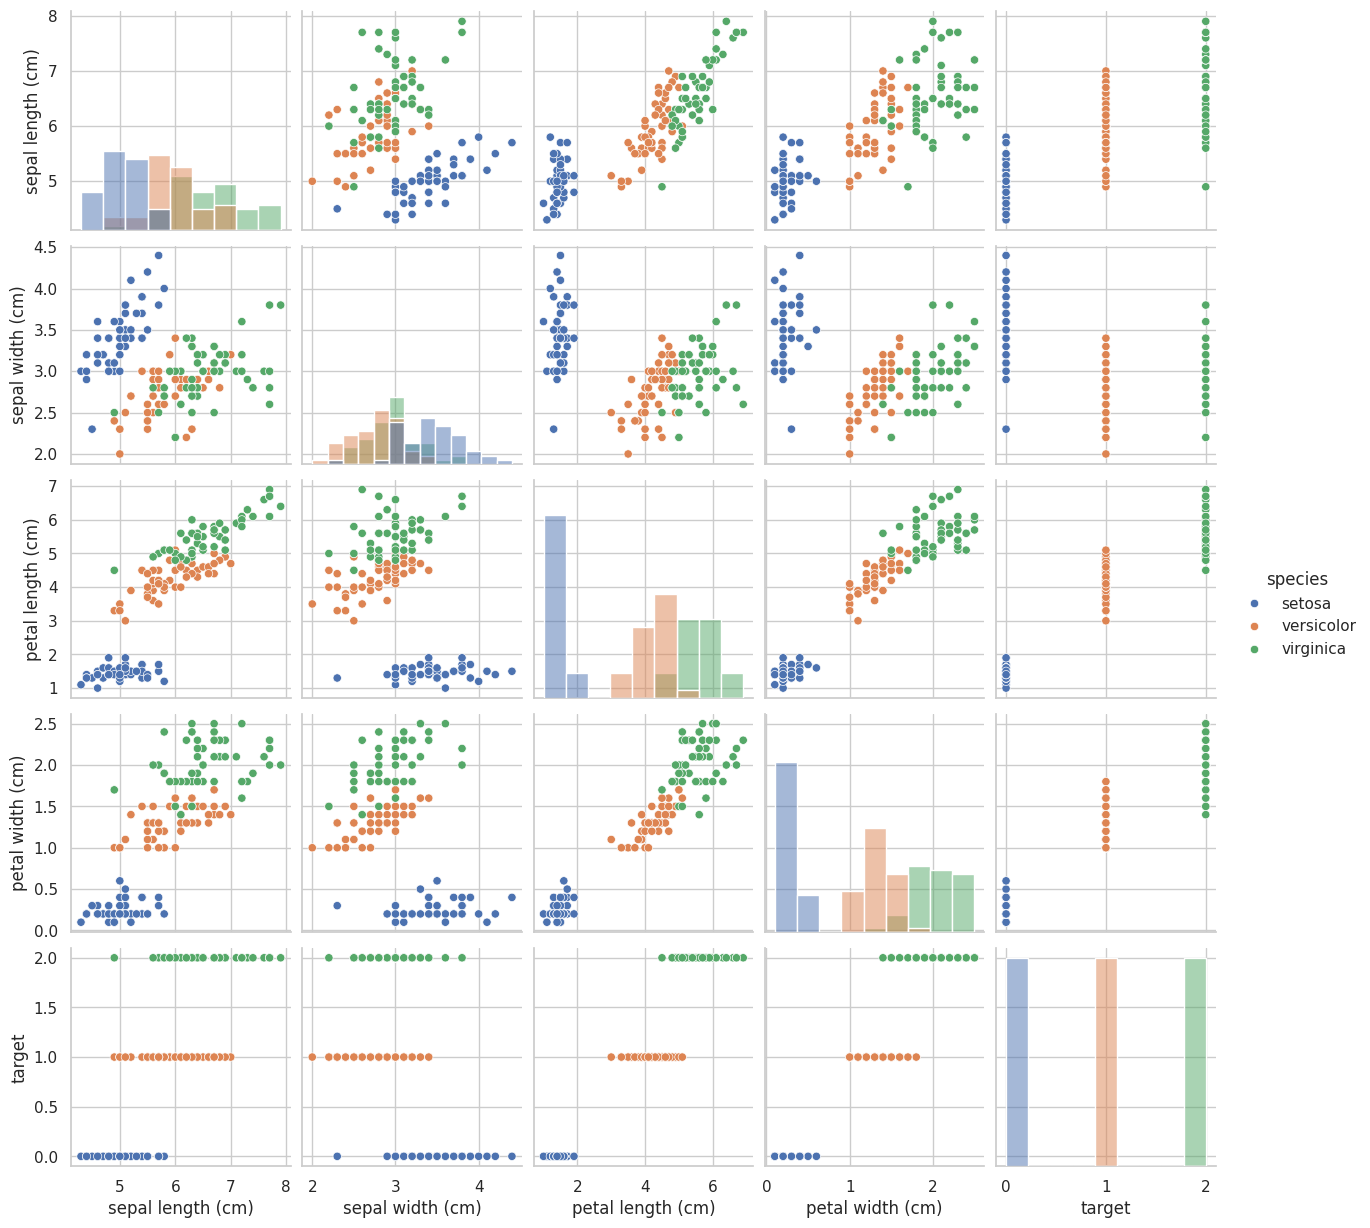

In [24]:
# =========================
# Task 2: Pairplot
# =========================
# Pairplot shows scatter plots for every pair of features
# and distributions on the diagonal.

sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()


# Task 3 — Train–Test Split & Feature Scaling

In this task, we will:
1. Split the dataset into **training** and **testing** sets
2. Understand why we never test on training data
3. Apply **feature scaling** using StandardScaler

Why this matters:
- Models must be tested on unseen data
- Feature scaling improves performance for distance-based models


In [25]:
# ==================================
# Task 3: Train–Test Split
# ==================================

from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = df[iris.feature_names]
y = df["target"]

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps class proportions equal
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (120, 4)
Testing set shape: (30, 4)


In [26]:
# ==================================
# Task 3: Feature Scaling
# ==================================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.721568,-0.332101,-1.345722,-1.323276
1,-1.124492,-1.227655,0.414505,0.651763
2,1.144395,-0.555990,0.584850,0.256755
3,-1.124492,0.115676,-1.288941,-1.454945
4,-0.408002,-1.227655,0.130598,0.125086


# Task 4 — Support Vector Machine (SVM)

In this task, we will:
1. Train a **basic SVM classifier**
2. Understand the role of **kernels**
3. Tune SVM **hyperparameters using GridSearchCV**
4. Decide which kernel and parameters work best

SVM will be our **primary model** in this lab.
Other models will be given later as **student exercises**.


In [27]:
# ==================================
# Step 4.1: Baseline SVM Model
# ==================================

from sklearn.svm import SVC

# Basic SVM with default settings
svm_baseline = SVC()

# Train the model
svm_baseline.fit(X_train_scaled, y_train)

print("Baseline SVM model trained")


Baseline SVM model trained


In [28]:
# ==================================
# Evaluate Baseline SVM
# ==================================

from sklearn.metrics import accuracy_score

y_pred_baseline = svm_baseline.predict(X_test_scaled)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print("Baseline SVM Accuracy:", baseline_accuracy)


Baseline SVM Accuracy: 0.9666666666666667


# Task 5 — Hyperparameter Tuning using GridSearchCV (SVM)

SVM performance depends heavily on:
- Kernel type
- Regularization parameter (C)
- Kernel-specific parameters (gamma, degree)

We will use **GridSearchCV** to find the best combination.


C → controls margin vs misclassification

gamma → influence range of a single data point

degree → polynomial complexity

kernel → how data is transformed

In [29]:
# ==================================
# Step 5.1: Hyperparameter Grid
# ==================================

from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "kernel": ["linear"],
        "C": [0.1, 1, 10, 100]
    },
    {
        "kernel": ["rbf"],
        "C": [0.1, 1, 10, 100],
        "gamma": [0.001, 0.01, 0.1, 1]
    },
    {
        "kernel": ["poly"],
        "C": [0.1, 1, 10],
        "degree": [2, 3, 4],
        "gamma": ["scale", "auto"]
    }
]


In [30]:
# ==================================
# Step 5.2: Grid Search
# ==================================

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Grid Search completed")


Grid Search completed


In [31]:
# ==================================
# Best Parameters
# ==================================

print("Best Parameters Found:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(grid_search.best_score_)


Best Parameters Found:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Best Cross-Validation Accuracy:
0.9833333333333332


In [32]:
# ==================================
# Evaluate Tuned SVM
# ==================================

best_svm = grid_search.best_estimator_

y_pred_best = best_svm.predict(X_test_scaled)

best_accuracy = accuracy_score(y_test, y_pred_best)

print("Tuned SVM Test Accuracy:", best_accuracy)


Tuned SVM Test Accuracy: 0.9666666666666667


In [33]:
# ==================================
# Kernel-wise Comparison
# ==================================

results = pd.DataFrame(grid_search.cv_results_)

kernel_performance = results.groupby("param_kernel")["mean_test_score"].max()

kernel_performance


,mean_test_score
param_kernel,
linear,0.975000
poly,0.975000
rbf,0.983333


# Section 6 — Model Evaluation Techniques (SVM)

Accuracy alone is **not sufficient** to evaluate a classification model.

In this section, we will evaluate the **tuned SVM model** using:
1. Confusion Matrix
2. Precision, Recall, F1-score
3. Classification Report
4. Macro, Micro, and Weighted F1-scores
5. ROC Curve & AUC (One-vs-Rest)
6. Cross-validation score
7. Final evaluation summary

These metrics help us understand **how and why** a model performs well or poorly.


## Confusion Matrix

**What it is:**  
A confusion matrix is a table that summarizes the classification results by showing the number of correct and incorrect predictions for each class.

**Why it is important:**  
Accuracy alone does not show *which classes are misclassified*.  
The confusion matrix helps identify:
- Class-wise errors
- Which classes are confused with each other
- Weaknesses of the model


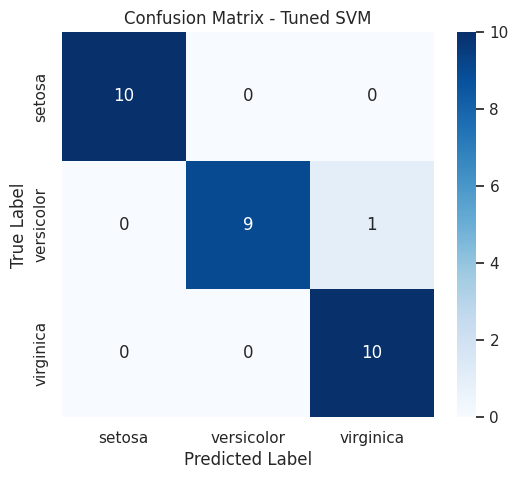

In [34]:
# ==================================
# Step 6.1: Confusion Matrix
# ==================================

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Tuned SVM")
plt.show()


## Classification Report

**What it is:**  
The classification report is a summary table that gives, for each class:
- Precision
- Recall
- F1-score
- Support (number of true samples in that class)

**Why it is important:**  
It provides a complete view of performance per class, not just one overall number like accuracy.


## Precision

**What it is:**  
Precision measures how many of the samples predicted as a particular class are actually correct.

**Formula:**  
Precision = TP / (TP + FP)

- TP = True Positives (correctly predicted as the class)  
- FP = False Positives (predicted as the class but actually not)

**Why it is important:**  
High precision means fewer false positives. This metric is important when false alarms are costly or undesirable.


## Recall

**What it is:**  
Recall measures how many actual samples of a class are correctly identified by the model.

**Formula:**  
Recall = TP / (TP + FN)

- TP = True Positives  
- FN = False Negatives (actually the class but predicted as something else)

**Why it is important:**  
High recall means fewer false negatives. This is critical when missing true samples is more serious than false alarms.


## F1-Score

**What it is:**  
The F1-score is a single metric that balances precision and recall.

**Formula:**  
F1 = 2 * (Precision * Recall) / (Precision + Recall)

**Why it is important:**  
F1-score is useful when:
- you care about both precision and recall
- class distribution is imbalanced (accuracy can be misleading)


## Support

**What it is:**  
Support is the number of *actual samples* of each class present in the test dataset.

**What it tells us:**  
- How many data points belong to each class
- The class distribution in the evaluation set

**Why it is important:**  
Support gives context to precision, recall, and F1-score.

- A high F1-score with very low support may not be reliable  
- Metrics from classes with large support are statistically more stable  
- Support explains why **weighted averages** behave differently from macro averages

**Example:**  
If the support for a class is 10, the model was evaluated on only 10 samples of that class.  
If the support is 100, the evaluation is more reliable.

**Key point:**  
Support does **not** measure model performance.  
It only tells *how many samples were used* to compute the metrics.


In [35]:
# ==================================
# Step 6.2: Classification Report
# ==================================

from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred_best,
    target_names=iris.target_names
))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Precision → How correct the model’s positive predictions are

Recall → How many actual samples the model captured

F1-score → Balance between precision & recall

Support → Number of samples in each class

“If precision is high but recall is low → model is conservative.”

## Macro, Micro, and Weighted F1-Scores

These are different ways of combining F1-scores in multi-class classification.

**Macro F1:**  
- Compute F1-score separately for each class  
- Then take the average (all classes treated equally)

**Why important:**  
Good when you want to evaluate performance fairly across all classes, even small classes.

**Micro F1:**  
- Combine all TP, FP, FN from all classes first  
- Then compute F1 once (gives more weight to larger classes)

**Why important:**  
Useful when overall performance on the full dataset matters more than small-class fairness.

**Weighted F1:**  
- Compute F1 for each class  
- Average them using class size as weights

**Why important:**  
Balanced choice when classes are not equal in size.


In [36]:
# ==================================
# Step 6.3: F1-Score Variants
# ==================================

from sklearn.metrics import f1_score

f1_macro = f1_score(y_test, y_pred_best, average="macro")
f1_micro = f1_score(y_test, y_pred_best, average="micro")
f1_weighted = f1_score(y_test, y_pred_best, average="weighted")

print("F1-score (Macro):", f1_macro)
print("F1-score (Micro):", f1_micro)
print("F1-score (Weighted):", f1_weighted)


F1-score (Macro): 0.9665831244778612
F1-score (Micro): 0.9666666666666667
F1-score (Weighted): 0.9665831244778613


Macro F1 → treats all classes equally

Micro F1 → influenced by large classes

Weighted F1 → balances class size and performance

📌 In imbalanced datasets, accuracy can lie — F1 matters more.

In [37]:
# ==================================
# Step 6.4: Overall Precision & Recall
# ==================================

from sklearn.metrics import precision_score, recall_score

precision_macro = precision_score(y_test, y_pred_best, average="macro")
recall_macro = recall_score(y_test, y_pred_best, average="macro")

print("Macro Precision:", precision_macro)
print("Macro Recall:", recall_macro)


Macro Precision: 0.9696969696969697
Macro Recall: 0.9666666666666667


Precision answers “How reliable are predictions?”

Recall answers “How many did we catch?”

## ROC Curve

**What it is:**  
The ROC curve is a graph that shows model performance across different decision thresholds by plotting:
- True Positive Rate (TPR) against
- False Positive Rate (FPR)

**Why it is important:**  
It shows how well the classifier separates classes at different thresholds, not just at one fixed threshold.


## AUC (Area Under the Curve)

**What it is:**  
AUC is the area under the ROC curve. It is a single number that summarizes ROC performance.

**Interpretation:**  
- AUC = 1.0 → perfect separation  
- AUC = 0.5 → random guessing  

**Why it is important:**  
Higher AUC means better ability to distinguish classes.


In [38]:
# ==================================
# Step 6.5: ROC & AUC (OvR)
# ==================================

svm_prob = SVC(
    kernel=best_svm.kernel,
    C=best_svm.C,
    gamma=getattr(best_svm, "gamma", "scale"),
    probability=True
)

svm_prob.fit(X_train_scaled, y_train)

y_prob = svm_prob.predict_proba(X_test_scaled)


## One-vs-Rest (OvR) ROC for Multi-Class Classification

**What it is:**  
ROC is originally designed for binary classification. For multi-class problems, we use One-vs-Rest:
- Pick one class as “positive”
- Treat all other classes as “negative”
- Repeat for each class

**Why it is important:**  
This allows ROC and AUC analysis for multi-class classification like Iris (3 classes).


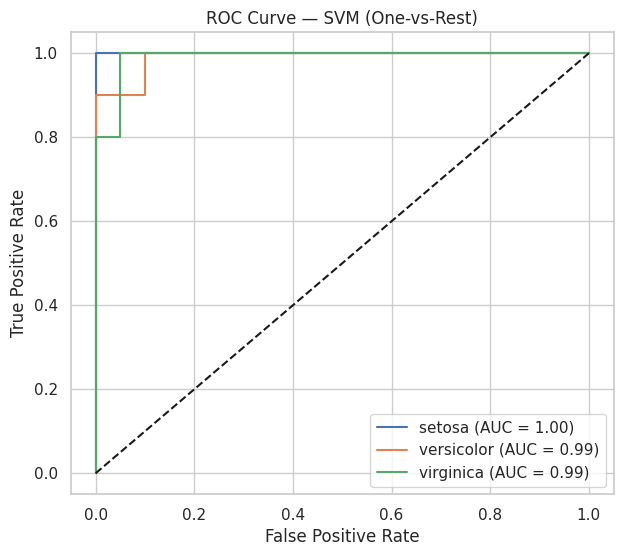

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0,1,2])

plt.figure(figsize=(7,6))

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{iris.target_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — SVM (One-vs-Rest)")
plt.legend()
plt.show()


ROC shows trade-off between sensitivity & specificity

AUC close to 1 → excellent model

OvR handles multi-class classification

## Cross-Validation Score

**What it is:**  
Cross-validation evaluates the model using multiple train/test splits (folds) instead of only one split.

**Why it is important:**  
It measures how stable and reliable the model is. If scores vary a lot across folds, the model may not generalize well.


In [40]:
# ==================================
# Step 6.6: Cross-Validation Score
# ==================================

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    best_svm,
    X_train_scaled,
    y_train,
    cv=5,
    scoring="accuracy"
)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.91666667 1.         1.         1.         1.        ]
Mean CV accuracy: 0.9833333333333332


Checks model stability

Reduces risk of lucky train–test splits

In [41]:
# ==================================
# Final Evaluation Summary
# ==================================

evaluation_summary = pd.DataFrame({
    "Metric": [
        "Test Accuracy",
        "F1 Macro",
        "F1 Micro",
        "F1 Weighted",
        "Macro Precision",
        "Macro Recall",
        "Mean CV Accuracy"
    ],
    "Score": [
        best_accuracy,
        f1_macro,
        f1_micro,
        f1_weighted,
        precision_macro,
        recall_macro,
        cv_scores.mean()
    ]
})

evaluation_summary


,Metric,Score
0,Test Accuracy,0.966667
1,F1 Macro,0.966583
2,F1 Micro,0.966667
3,F1 Weighted,0.966583
4,Macro Precision,0.969697
5,Macro Recall,0.966667
6,Mean CV Accuracy,0.983333


# “A good model is not the one with the highest accuracy,
# but the one that performs consistently, fairly, and reliably across all classes.”

### Exercise 1 — Logistic Regression

1. Train a Logistic Regression model
2. Tune the `C` parameter using GridSearchCV
3. Compare its accuracy with the tuned SVM
4. Comment on:
   - Model simplicity
   - Performance difference


### Exercise 2 — K-Nearest Neighbors (KNN)

1. Train a KNN classifier
2. Use GridSearchCV to tune:
   - n_neighbors
   - weights
   - distance metric
3. Compare KNN results with SVM


### Exercise 3 — Final Comparison

Create a table comparing:
- Tuned SVM
- Logistic Regression
- KNN

Include:
- Accuracy
- Strengths
- Weaknesses


1. Why is F1-score preferred over accuracy in some cases?
2. What does macro F1 emphasize?
3. Why is ROC harder for multi-class problems?
4. Why is cross-validation important?


# Extra

In [42]:
# ==================================
# Logistic Regression
# ==================================

from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully")


Logistic Regression model trained successfully


In [43]:
# ==================================
# K-Nearest Neighbors (KNN)
# ==================================

from sklearn.neighbors import KNeighborsClassifier

# Choose k = 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

print("KNN model trained successfully")


KNN model trained successfully
